**Name- HARSH PRAKASH SINHA \
SAP - 500123860**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# -------------------------------
# 1. Device config
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------------
# 2. Dataset & Dataloader
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

num_classes = 10

# -------------------------------
# 3. Model setup function
# -------------------------------
def get_model(name, num_classes):
    if name == "alexnet":
        model = models.alexnet(pretrained=True)
        model.classifier[6] = nn.Linear(4096, num_classes)
    elif name == "resnet":
        model = models.resnet50(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == "googlenet":
        model = models.googlenet(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif name == "vgg19":
        model = models.vgg19(pretrained=True)
        model.classifier[6] = nn.Linear(4096, num_classes)
    return model.to(device)

# -------------------------------
# 4. Training function
# -------------------------------
def train_model(model, trainloader, epochs=1):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}")

# -------------------------------
# 5. Evaluation function
# -------------------------------
def evaluate_model(model, testloader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return acc, prec, rec, f1

# -------------------------------
# 6. Run experiments
# -------------------------------
results = []
models_list = ["alexnet", "resnet", "googlenet", "vgg19"]

for m in models_list:
    print(f"\n===== Training {m.upper()} =====")
    model = get_model(m, num_classes)
    train_model(model, trainloader, epochs=2)  # change epochs for better results
    acc, prec, rec, f1 = evaluate_model(model, testloader)
    results.append([m, acc, prec, rec, f1])

# -------------------------------
# 7. Results table
# -------------------------------
df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print("\nFinal Comparison:\n", df)


Using device: cuda


100%|██████████| 170M/170M [00:04<00:00, 34.4MB/s]



===== Training ALEXNET =====


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 189MB/s]


Epoch [1/2], Loss: 0.5318
Epoch [2/2], Loss: 0.2969

===== Training RESNET =====


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 195MB/s]


Epoch [1/2], Loss: 0.3318
Epoch [2/2], Loss: 0.1572

===== Training GOOGLENET =====
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 49.7M/49.7M [00:00<00:00, 134MB/s]


Epoch [1/2], Loss: 0.3705
Epoch [2/2], Loss: 0.1302

===== Training VGG19 =====


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


100%|██████████| 548M/548M [00:06<00:00, 85.9MB/s]


Epoch [1/2], Loss: 0.5070
Epoch [2/2], Loss: 0.2651

Final Comparison:
        Model  Accuracy  Precision  Recall  F1-score
0    alexnet    0.8902   0.892502  0.8902  0.890273
1     resnet    0.9373   0.938087  0.9373  0.937136
2  googlenet    0.9434   0.943809  0.9434  0.943204
3      vgg19    0.9017   0.902343  0.9017  0.901145


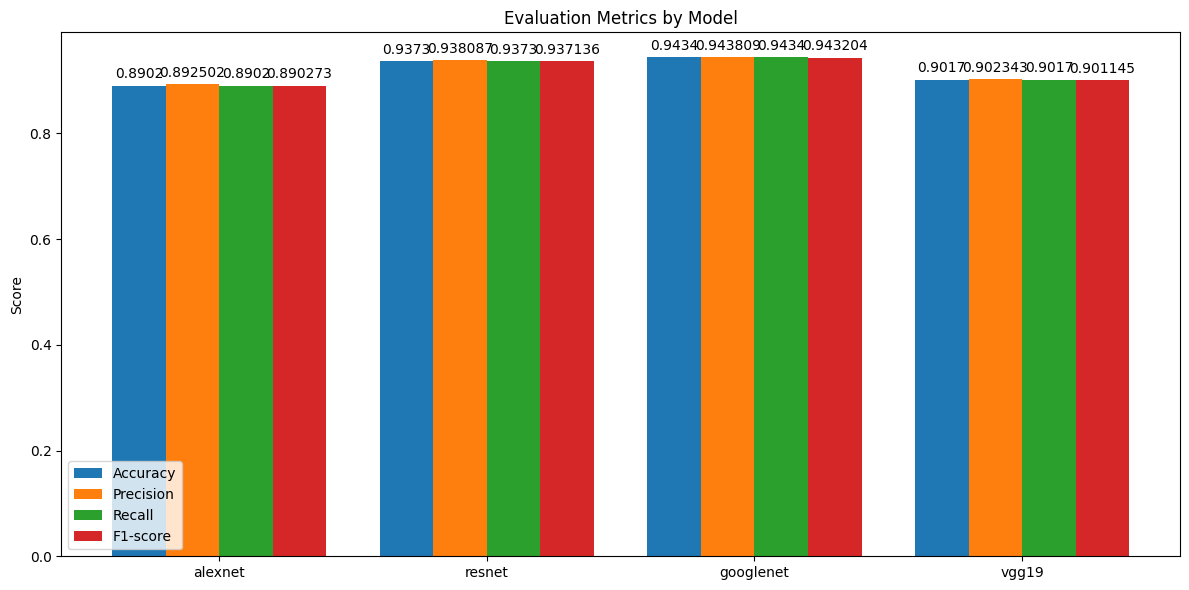

In [2]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = df['Model']

x = np.arange(len(models)) # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    rects = ax.bar(x + i * width - 1.5 * width, df[metric], width, label=metric)
    ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()